# 911 Calls

Dataset took from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

## Initial Infos

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Creating new features

In the titles column. before the ':' there are listed "Reasons/Departments".
Let's separate them in a colum of its own.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [5]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

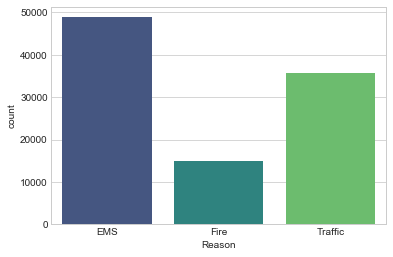

In [6]:
sns.countplot(x='Reason',data=df,palette='viridis')

The timeStamp column type is string. Let's convert it to datetime, and separate the dates in hour, month, day of week

In [7]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [8]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

Day of Week is an integer, it can be mapped into a string

In [9]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

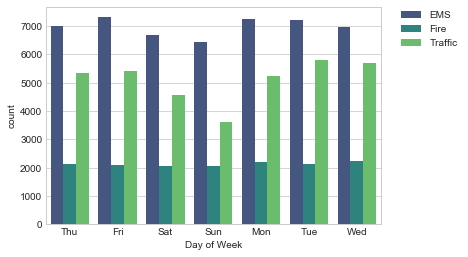

In [10]:
# countplot of day of week with hue = Reason

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

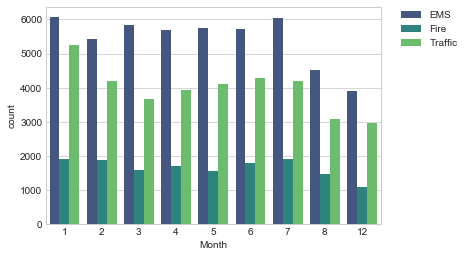

In [11]:
# countplot of month with hue = Reason

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

There are months missing! The info cold be filled in a seaborn lineplot

In [12]:
# aggregate the df by month, for counting the calls

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


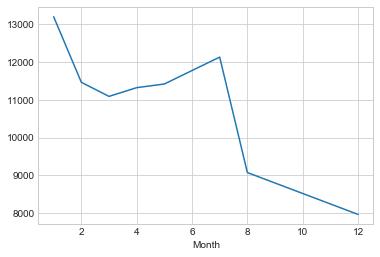

In [13]:
# count of calls per month
# could be any column
byMonth['twp'].plot()

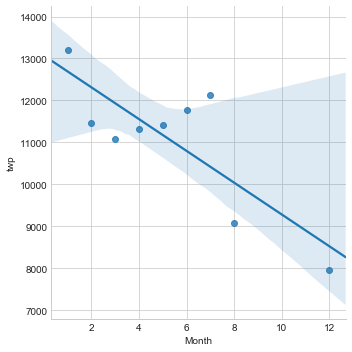

In [14]:
# seaborn.lmplot creates a linear fit on the dataset
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [20]:
# transform timestamp into date
df['Date']=df['timeStamp'].apply(lambda t: t.date())

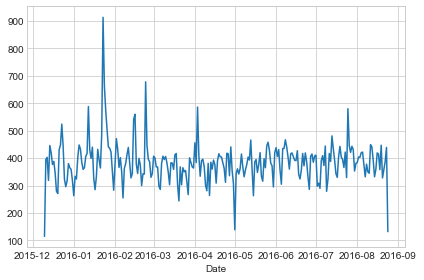

In [21]:
# count the number of calls by date
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

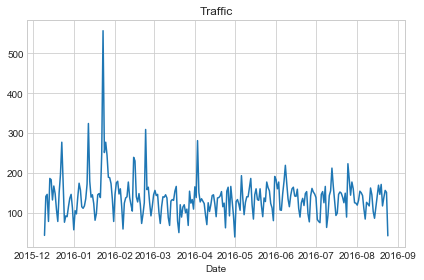

In [22]:
# count the number of calls by date with reason Traffic

df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

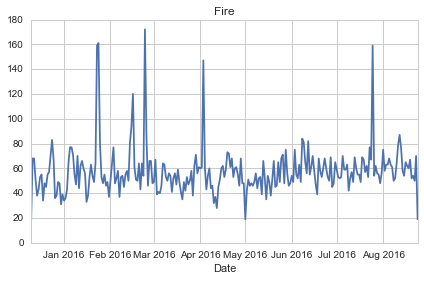

In [49]:
# count the number of calls by date with reason Fire

df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

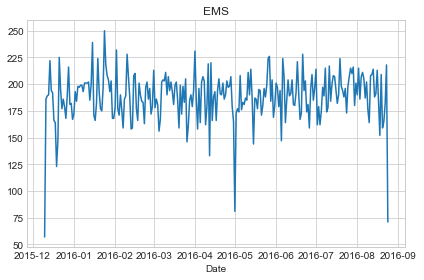

In [23]:
# count the number of calls by date with reason EMS

df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

## Heatmaps

### Heatmap by day

In [37]:
# group by 2 indexes, then unstack hour into columns

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [40]:
# for ordering days in the plot

dayHour = dayHour.reindex(reversed(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))

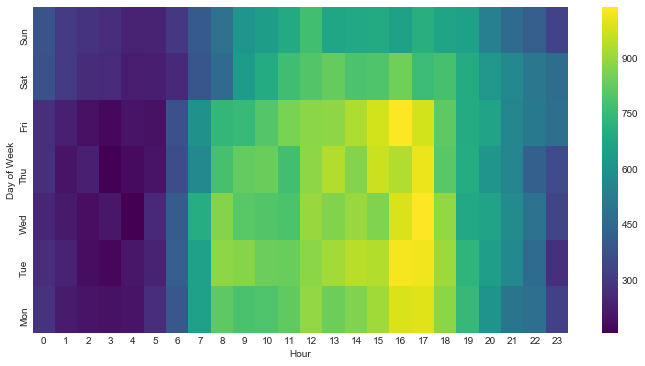

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

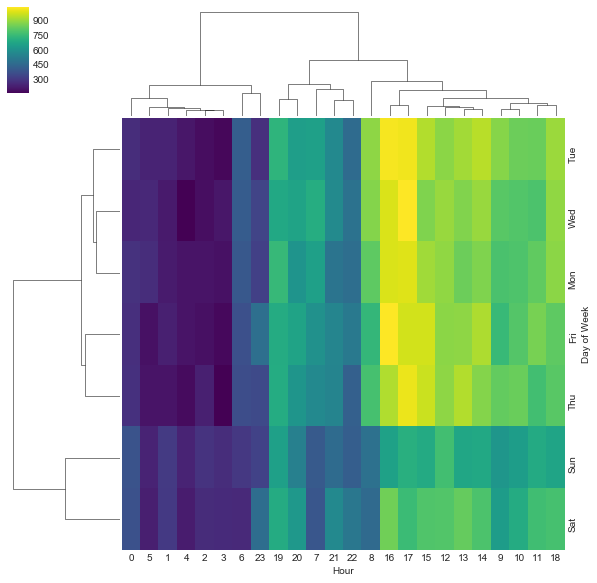

In [43]:
# the clustermap is a heatmap that clusters similar values, in different levels
# thus, the index order changes

sns.clustermap(dayHour,cmap='viridis')

### Heatmap by Month

In [44]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [47]:
dayMonth = dayMonth.reindex(reversed(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))

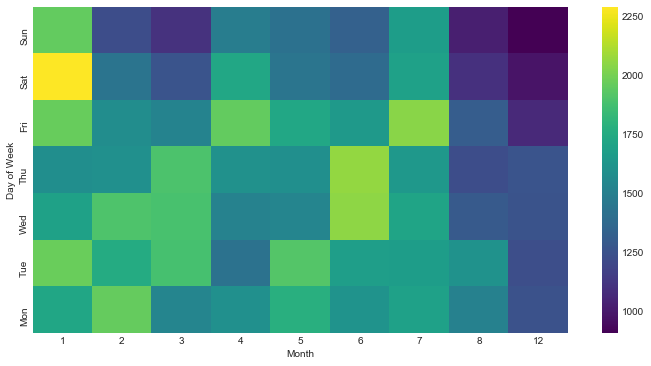

In [48]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

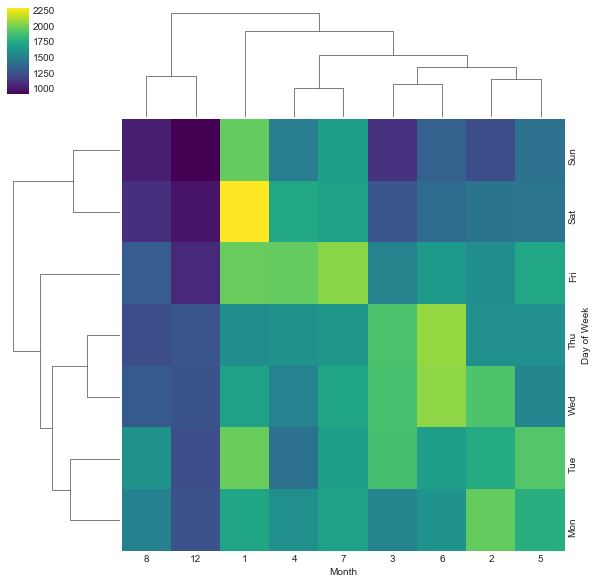

In [49]:
sns.clustermap(dayMonth,cmap='viridis')